In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%config InlineBackend.figure_format='retina'

matplotlib.rcParams['font.family'] = "Arial"


In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [3]:
counts_df = pd.read_csv('../data/counts_df.csv')
pairs_df = pd.read_csv('../data/pairs_df.csv')

## Is there in general an increase or decrease of binary oppositions in newspaper?

In [4]:
total = counts_df.groupby('year').sum()
total['rel'] = total['article_count'] / total['total_pairs']

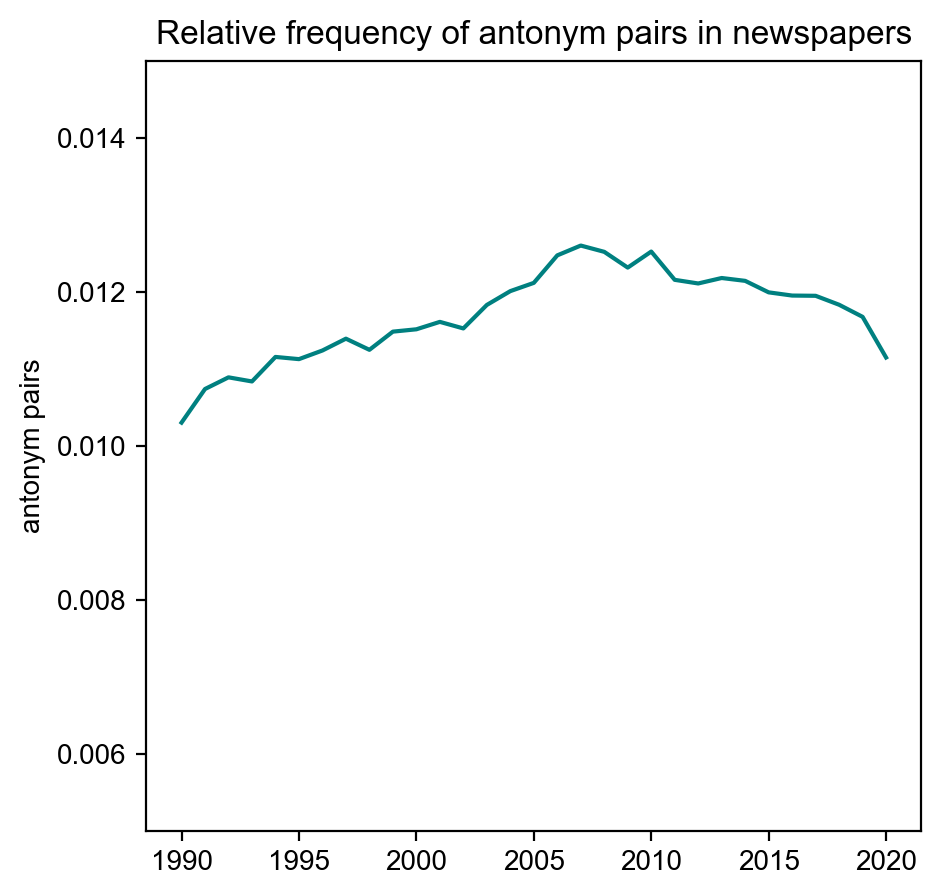

In [45]:
fig, ax  = plt.subplots(figsize=(5, 5))
ax.plot(total.index, total.rel, color = 'teal')
#ax.scatter(total.index, total.rel * 100, s=20)
ax.set_ylim(0.005, 0.015)
ax.set_ylabel('antonym pairs')
ax.set_title('Relative frequency of antonym pairs in newspapers')

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

fig.savefig('../images/relfreq_pairs.pdf', bbox_inches='tight')

# small increase until 2010, then decrease

# what are the most popular antonym pairs?

In [8]:
pairs_df[['w1', 'w2']].value_counts()[20:40]

w1              w2         
vader           moeder         5639
ander           één            5581
jaar            kwartaal       5526
europees        amerikaans     5365
werkgever       werknemer      5171
jaar            kort           4703
amerikaans      nederlands     4406
ander           oud            4222
goed            slecht         4199
duits           nederlands     4150
uur             week           4060
internationaal  nederlands     3915
zoon            vader          3915
amerikaans      brits          3861
politie         justitie       3849
ministerie      defensie       3660
minister        president      3604
meisje          jongen         3596
oud             kind           3591
nederlands      buitenlands    3577
dtype: int64

In [5]:
# Function to get the most frequent word combinations for each year
def get_most_frequent_combinations(year_group):
    combinations_count = year_group[['w1', 'w2']].value_counts()
    return combinations_count.head(10)

# Group by 'year' and apply the get_most_frequent_combinations function to each group
result = pairs_df.groupby('year').apply(get_most_frequent_combinations)

total_counts = counts_df.groupby('year')['total_pairs'].sum()
normalized_result = result.div(total_counts, level=0)

In [28]:
non_bold_labels = ['euro - procent', 'jaar - kwartaal', 'jaar - maand', 'dag - week', 'jaar - week', 'keer - één', 'ministerie - volksgezondheid', 'procent - totaal', 'minister - president', 'monetair - economisch']

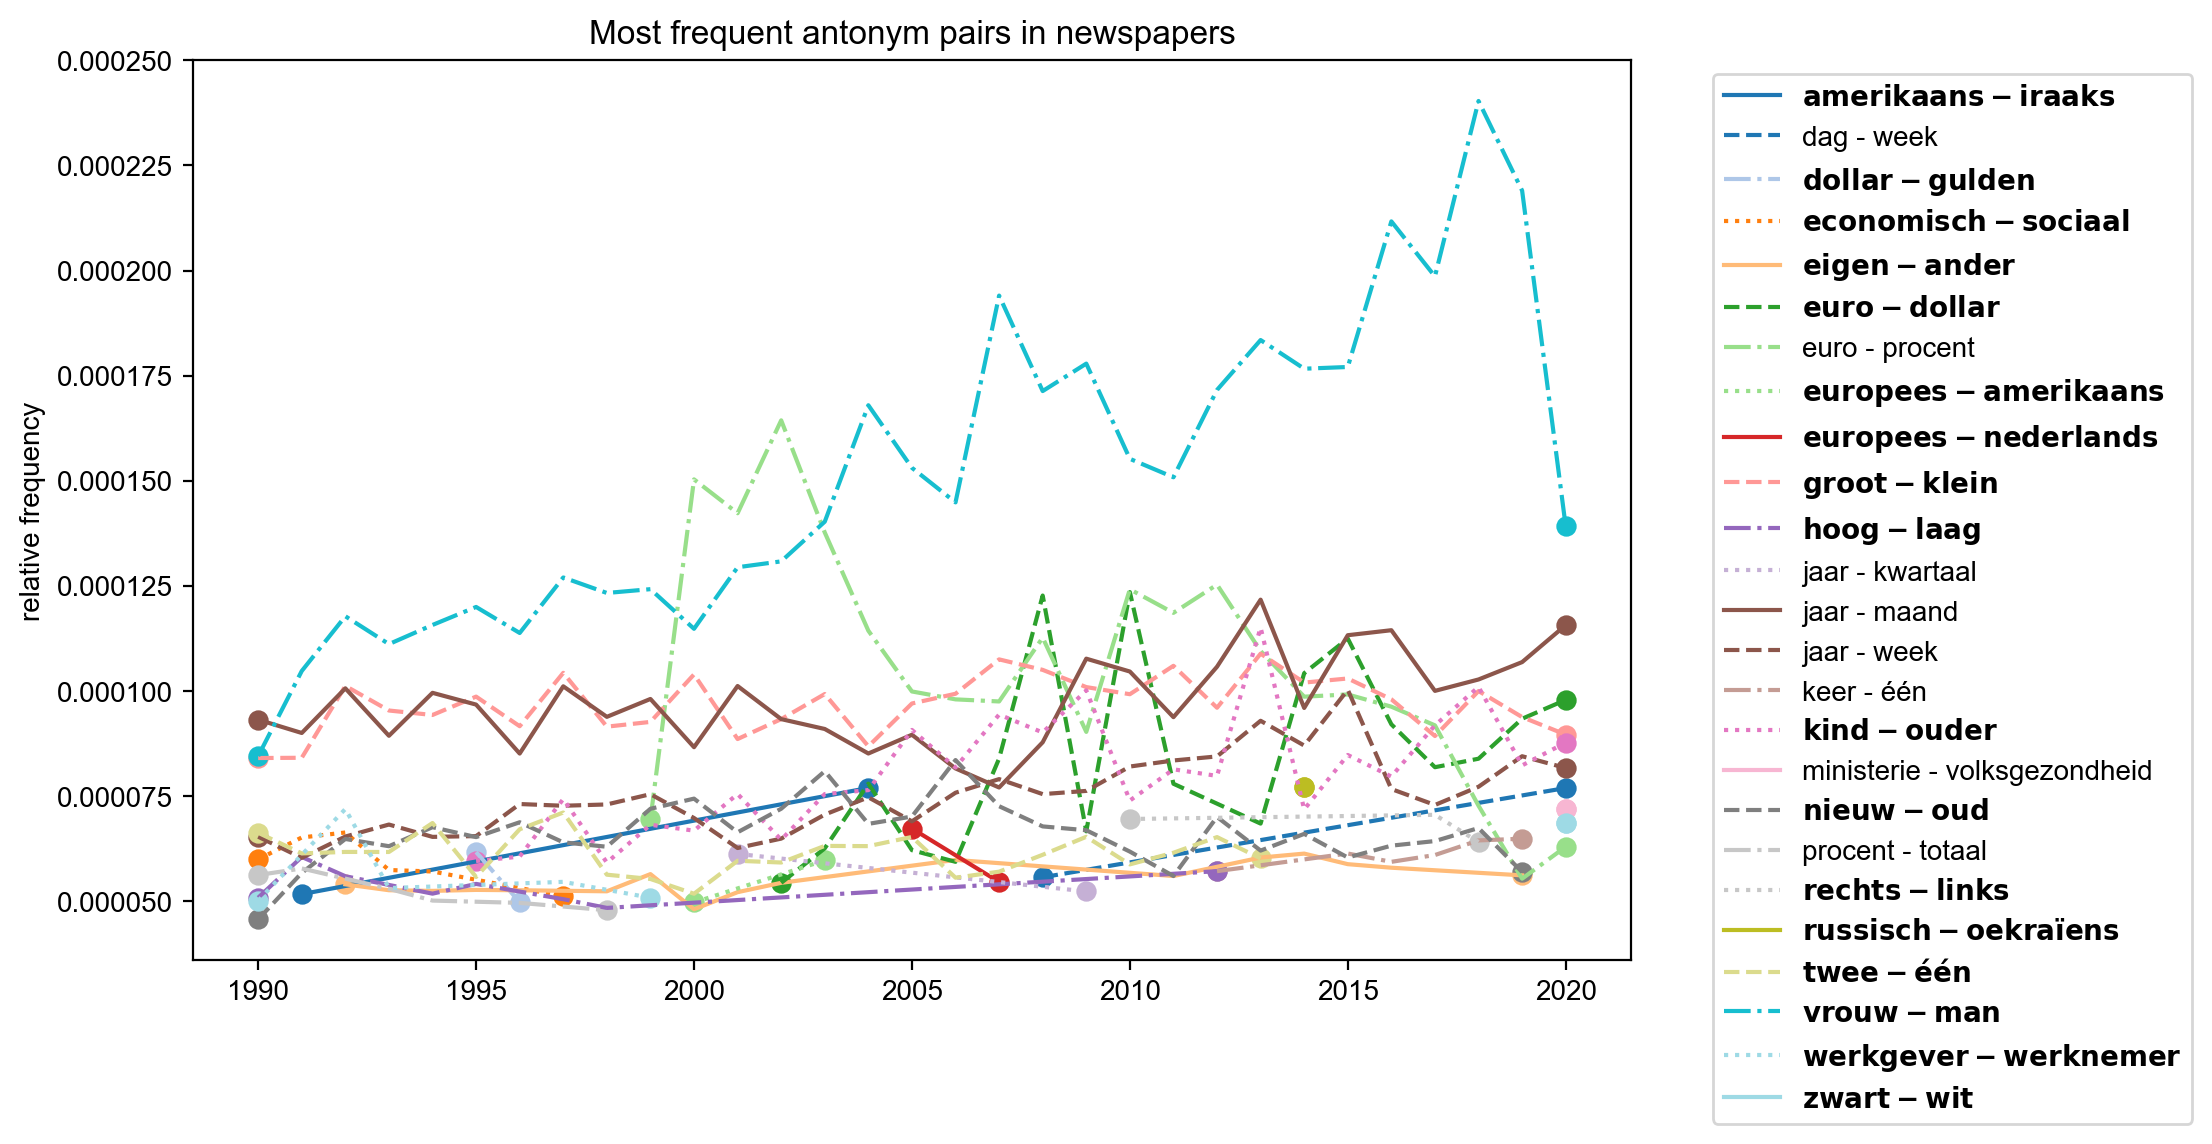

In [29]:
plt.figure(figsize=(12,6))

# Get a list of 25 distinct colors for the legend
num_colors = 25
color_map = plt.get_cmap('tab20')
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]

# Define a list of line styles to cycle through
line_styles = ['-', '--', '-.', ':']

# Iterate through each word pair and plot its frequency for each year
for i, ((word_pair_w1, word_pair_w2), group) in enumerate(normalized_result.groupby(level=[1, 2])):
    years = group.index.get_level_values(0)
    frequencies = group.values
    label = f'{word_pair_w1} - {word_pair_w2}'
    if label not in non_bold_labels:
        label = r'$\bf{' + label + '}$'
    line_style = line_styles[i % len(line_styles)]
    plt.plot(years, frequencies, label=label, color=colors.pop(0), linestyle=line_style)

colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]

for i, ((word_pair_w1, word_pair_w2), group) in enumerate(normalized_result.groupby(level=[1, 2])):
    years = group.index.get_level_values(0)
    frequencies = group.values
    first_data_point = (years[0], frequencies[0])
    plt.scatter(*first_data_point, s=40, marker='o', color=colors.pop(0), label=None)
    
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]

for i, ((word_pair_w1, word_pair_w2), group) in enumerate(normalized_result.groupby(level=[1, 2])):   
    years = group.index.get_level_values(0)
    frequencies = group.values
    last_data_point = (years[-1], frequencies[-1])
    plt.scatter(*last_data_point, s=40, marker='o', color=colors.pop(0), label=None)


plt.ylabel('relative frequency')
plt.title('Most frequent antonym pairs in newspapers')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
#plt.grid(True)
plt.tight_layout()
plt.savefig('../images/mf_pairs_bold.pdf', bbox_inches='tight')

### what are the articles with the highest frequency of antonym pairs?

In [7]:
counts_df.sort_values('article_count', ascending=False).article_id.values[:20]

array(['19_https://www.nrc.nl/nieuws/2011/11/05/ha-he-lieve-beb-cnof-nee-12043646-a673322',
       '29_https://www.nrc.nl/nieuws/2008/08/08/op-jacht-naar-de-vijf-ringen-quiz-zijn-deze-sporten-11585247-a737971',
       '13_https://www.nrc.nl/nieuws/1998/08/07/willem-bilderdijk-ontmanteld-achterstevoren-de-toekomst-7410104-a1076234',
       '13_https://www.nrc.nl/nieuws/2017/05/26/het-fascisme-hoort-erbij-9930851-a1560409',
       '11_https://www.nrc.nl/nieuws/2019/03/13/avontuurlijk-imponeerdiner-met-ieniemienie-topgerechtjes-a3953089',
       '9_https://www.nrc.nl/nieuws/2011/09/03/warme-kleuren-12033382-a1059653',
       '2_https://www.nrc.nl/nieuws/1993/07/20/anderhalve-week-niet-olympische-sporten-bij-wereldspelen-7189981-a1249116',
       '3_https://www.nrc.nl/nieuws/2003/12/27/muziekvoorkeuren-vallen-in-vier-clusters-uiteen-7667491-a1121263',
       '18_https://www.nrc.nl/nieuws/2006/02/11/popsmaak-krijg-je-vooral-van-je-moeder-11082087-a950575',
       '72_https://www.nrc.nl/nieu

## • which antonym pairs decrease over time?

In [15]:
pairs_df['combined'] = pairs_df['w1'] + '_' + pairs_df['w2']

In [16]:
grouped_by_year = counts_df.groupby('year').sum().reset_index()
all_years = grouped_by_year.year.values

In [17]:
from collections import Counter

all_arrays = []
all_pairs = []
for pair, pair_df in tqdm(pairs_df.groupby('combined')):
    if len(pair_df) < 100:
        continue
    year_count = Counter(pair_df.year.value_counts().to_dict())
    array = [year_count[year] for year in all_years] 
    all_arrays.append(array)
    all_pairs.append(pair)

  0%|          | 0/128294 [00:00<?, ?it/s]

In [18]:
import numpy as np

def get_trends(X,Y, order=1):
    result = np.polyfit(X, list(Y), order)
    slope = result[-2]
    return float(slope)

rows = []
for i, col in enumerate(all_arrays):
    y = np.array(col) / grouped_by_year['total_pairs']
    slope = get_trends(grouped_by_year.index, y.values)
    rows.append([all_pairs[i], slope, y.values])

In [20]:
top_10_decrease =pd.DataFrame(rows, columns=['col', 'slope',  'y']).sort_values('slope', ascending=True).head(10)
top_10_decrease

,col,slope,y
424,dollar_gulden,-1.583379e-06,"[2.2230542425235176e-05, 3.2658117965336045e-0..."
2087,werkgever_werknemer,-1.375330e-06,"[5.007722188421397e-05, 5.0146013391935344e-05..."
494,economisch_sociaal,-1.058592e-06,"[5.9905461693265314e-05, 6.510553839541185e-05..."
1270,monetair_economisch,-1.028167e-06,"[3.9312959236205365e-05, 3.2026025359555345e-0..."
72,amerikaans_japans,-7.778234e-07,"[2.5272616651846307e-05, 2.3176728878625576e-0..."
459,duits_nederlands,-5.660642e-07,"[3.7440913558290825e-05, 3.792555634684185e-05..."
2196,zwart_blank,-5.580682e-07,"[3.463284504141901e-05, 3.2658117965336045e-05..."
1225,minister_president,-5.529016e-07,"[3.9312959236205365e-05, 4.2771599657827206e-0..."
67,amerikaans_iraaks,-5.019284e-07,"[3.650489071933355e-05, 5.162089613875697e-05,..."
1316,nederlands_buitenlands,-4.992823e-07,"[3.393082791220106e-05, 3.392230317689744e-05,..."


In [21]:
sel = []

for index, row in tqdm(pairs_df.iterrows(), total=pairs_df.shape[0]):
    d_row = dict(row)
    if d_row['combined'] in top_10_decrease['col'].values:
        sel.append(d_row)

sel_df = pd.DataFrame(sel)

  0%|          | 0/1698377 [00:00<?, ?it/s]

In [22]:
def get_frequencies(year_group):
    combinations_count = year_group[['w1', 'w2']].value_counts()
    return combinations_count

result = sel_df.groupby('year').apply(get_frequencies)

normalized_result_decrease = result.div(total_counts, level=0)

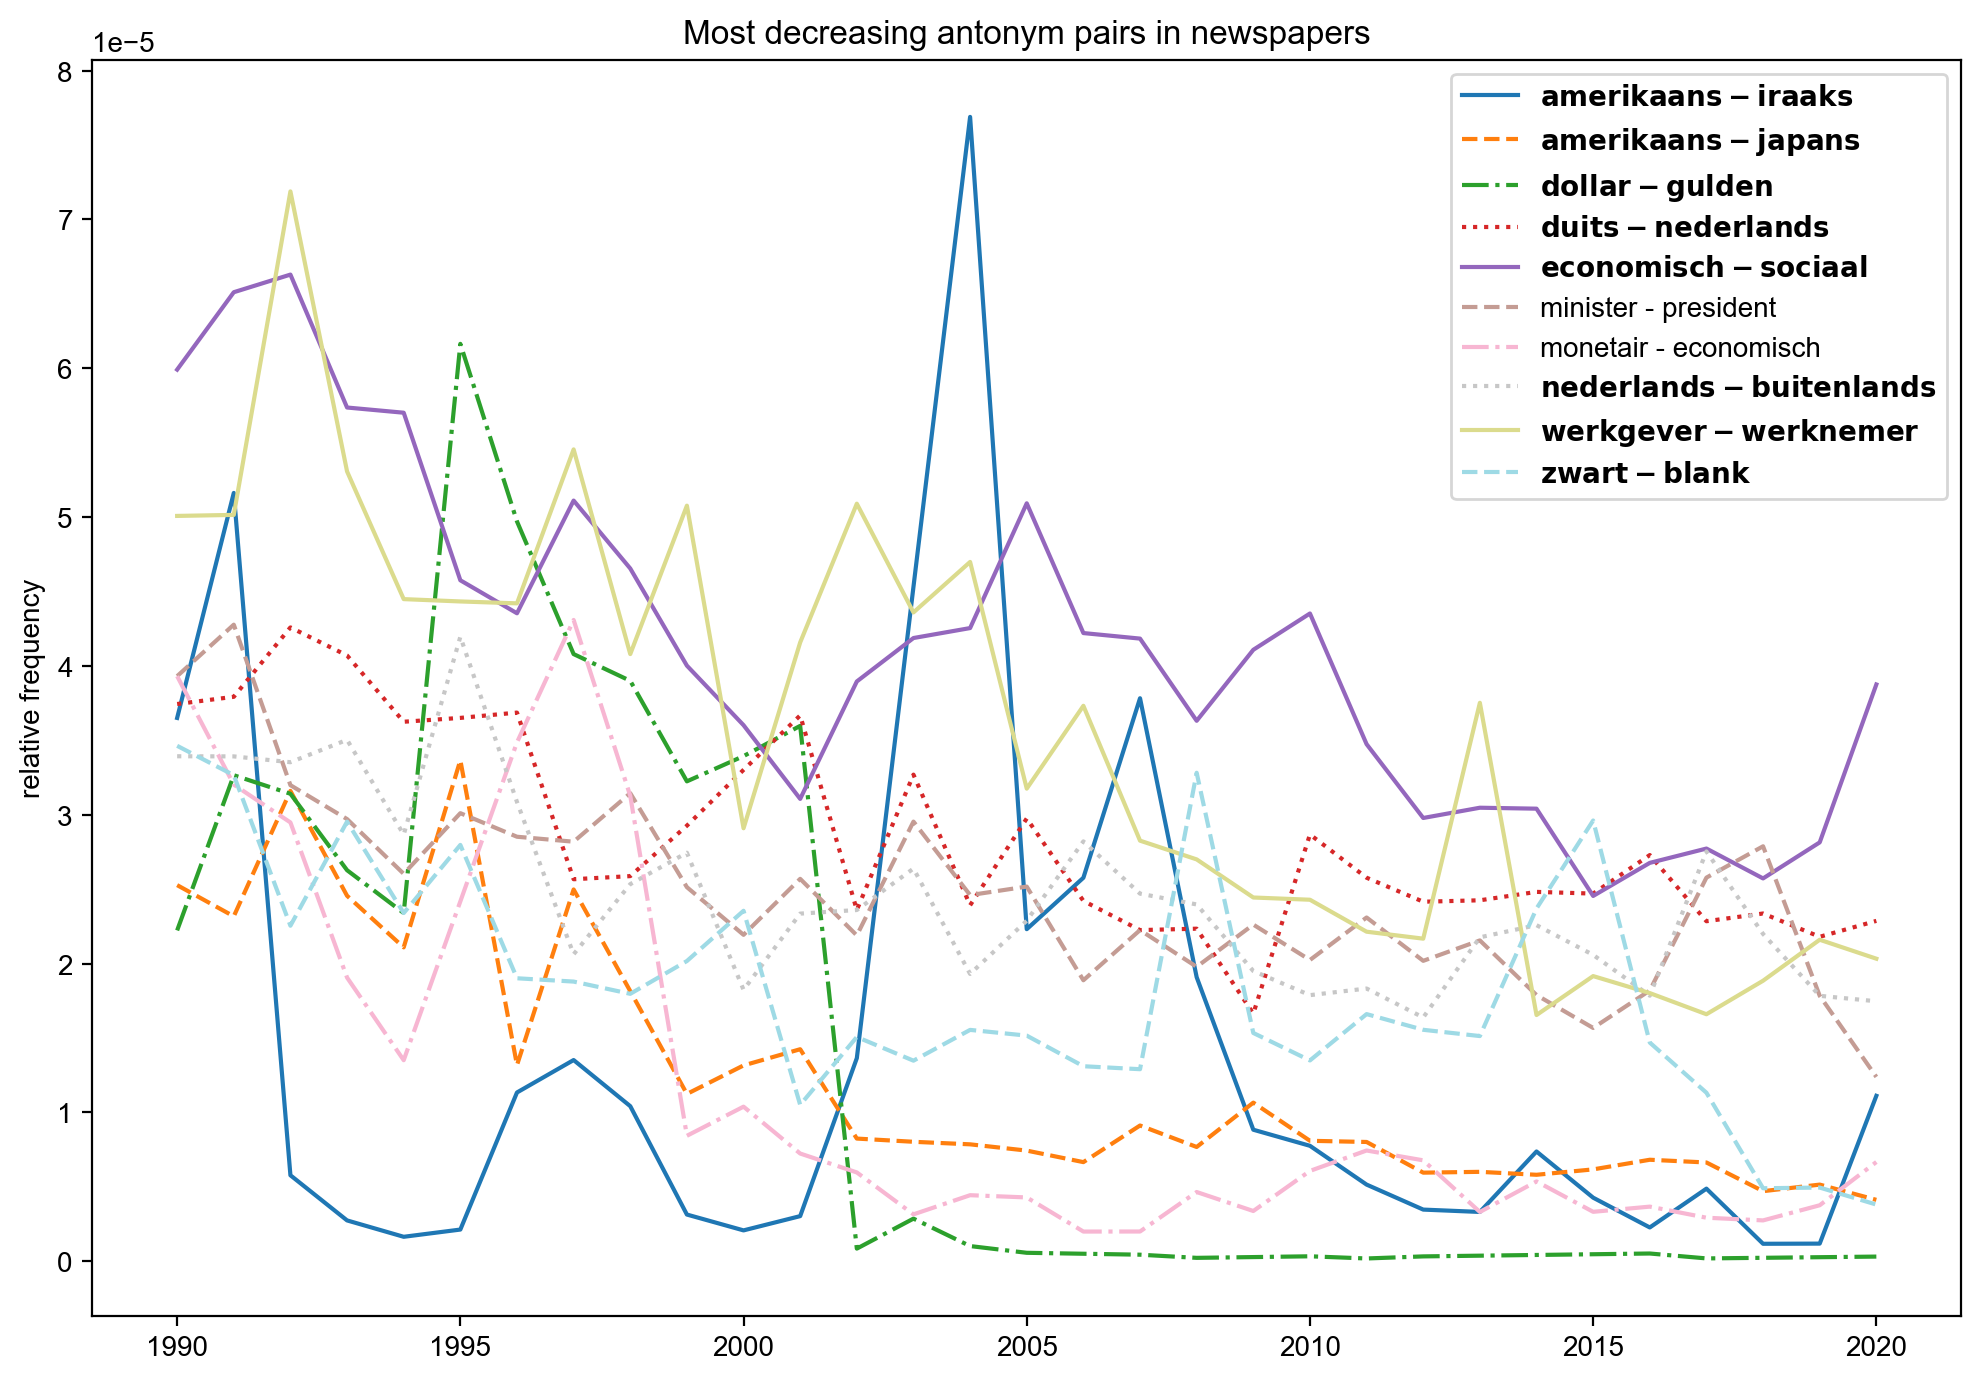

In [23]:
plt.figure(figsize=(10,7))

# Get a list of 25 distinct colors for the legend
num_colors = 10
color_map = plt.get_cmap('tab20')
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]

line_styles = ['-', '--', '-.', ':']

for i, ((word_pair_w1, word_pair_w2), group) in enumerate(normalized_result_decrease.groupby(level=[1, 2])):
    years = group.index.get_level_values(0)
    frequencies = group.values
    label = f'{word_pair_w1} - {word_pair_w2}'
    if label not in non_bold_labels:
        label = r'$\bf{' + label + '}$'
    line_style = line_styles[i % len(line_styles)]
    plt.plot(years, frequencies, label=label, color=colors.pop(0), linestyle=line_style)


plt.ylabel('relative frequency')
plt.title('Most decreasing antonym pairs in newspapers')
plt.legend()
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
plt.tight_layout()
plt.savefig('../images/decrease_pairs_bold.pdf', bbox_inches='tight')

## which antonym pairs increase over time?

In [24]:
top_10_increase =pd.DataFrame(rows, columns=['col', 'slope',  'y']).sort_values('slope', ascending=False).head(10)
top_10_increase

,col,slope,y
534,euro_dollar,4.024803e-06,"[0.0, 0.0, 0.0, 0.0, 0.0, 7.111894999982221e-0..."
2017,vrouw_man,3.551975e-06,"[8.447606121589366e-05, 0.00010471667502433556..."
538,euro_procent,3.238783e-06,"[0.0, 2.1069753526023254e-07, 3.85402569363309..."
961,kind_ouder,1.799056e-06,"[3.416483362194038e-05, 3.750416127632139e-05,..."
946,keer_één,9.580269e-07,"[3.229278794402584e-05, 3.3711605641637206e-05..."
1564,rechts_links,8.969320e-07,"[2.5272616651846307e-05, 2.275533380810511e-05..."
369,dag_week,8.087093e-07,"[4.071699349464127e-05, 3.918974155840325e-05,..."
1898,vader_moeder,7.971150e-07,"[1.8720456779145412e-05, 2.4019519019666507e-0..."
882,jong_oud,7.755773e-07,"[2.4570599522628353e-05, 2.8865562330651857e-0..."
869,jaar_week,7.449343e-07,"[6.528759301726962e-05, 6.0259495084426506e-05..."


In [25]:
sel = []

for index, row in tqdm(pairs_df.iterrows(), total=pairs_df.shape[0]):
    d_row = dict(row)
    if d_row['combined'] in top_10_increase['col'].values:
        sel.append(d_row)

sel_df = pd.DataFrame(sel)

  0%|          | 0/1698377 [00:00<?, ?it/s]

In [26]:
# Function to get the most frequent word combinations for each year
def get_most_frequent_combinations(year_group):
    combinations_count = year_group[['w1', 'w2']].value_counts()
    return combinations_count

# Group by 'year' and apply the get_most_frequent_combinations function to each group
result = sel_df.groupby('year').apply(get_most_frequent_combinations)

normalized_result_increase = result.div(total_counts, level=0)

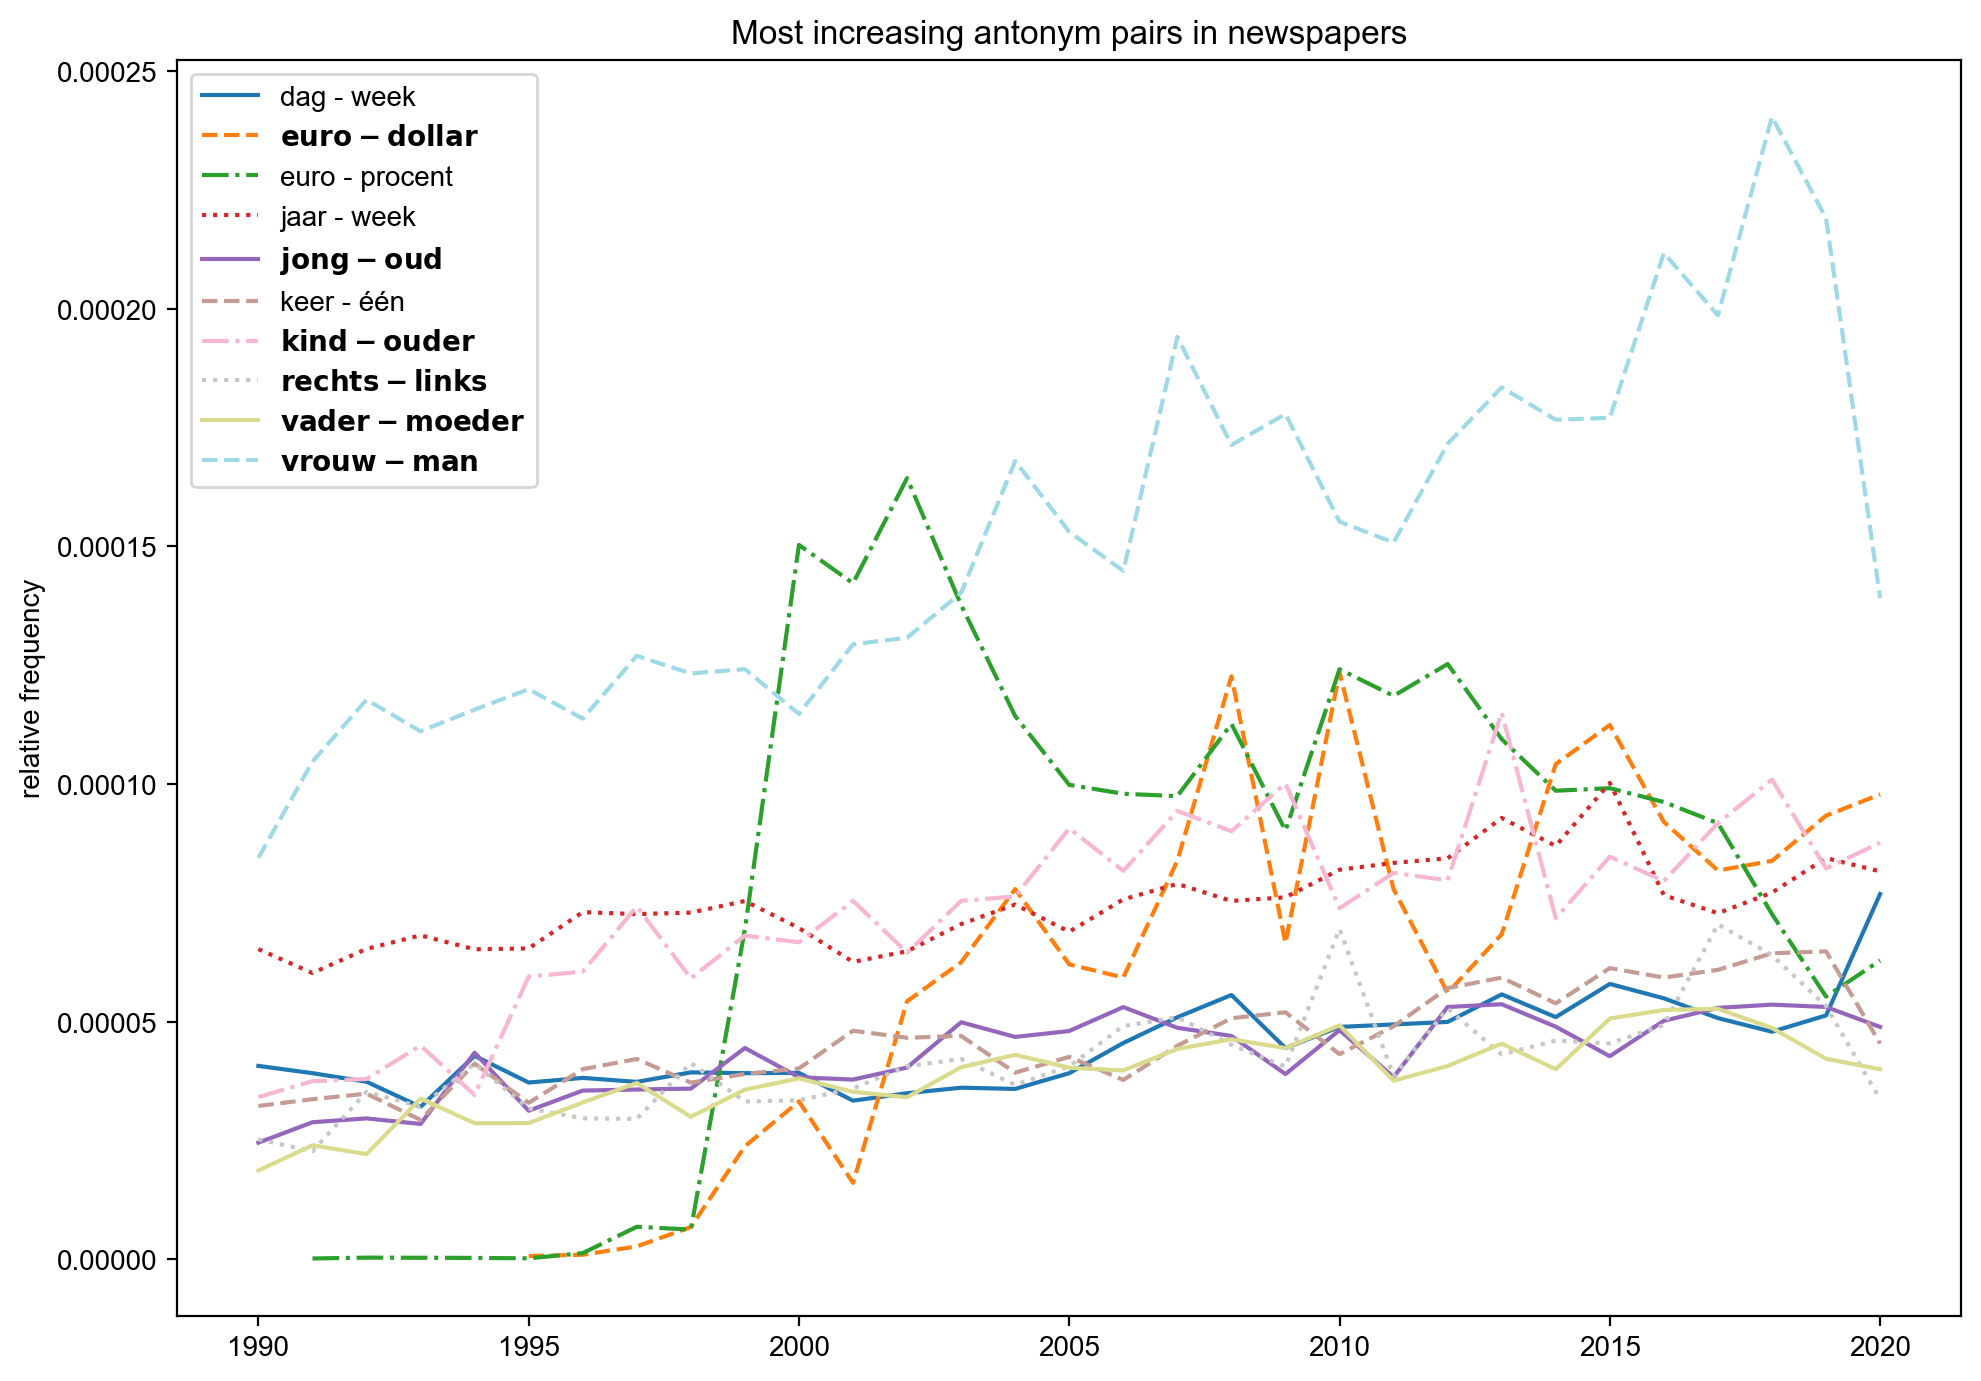

In [30]:
plt.figure(figsize=(10,7))

# Get a list of 25 distinct colors for the legend
num_colors = 10
color_map = plt.get_cmap('tab20')
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]

line_styles = ['-', '--', '-.', ':']

for i, ((word_pair_w1, word_pair_w2), group) in enumerate(normalized_result_increase.groupby(level=[1, 2])):
    years = group.index.get_level_values(0)
    frequencies = group.values
    label = f'{word_pair_w1} - {word_pair_w2}'
    if label not in non_bold_labels:
        label = r'$\bf{' + label + '}$'
    line_style = line_styles[i % len(line_styles)]
    plt.plot(years, frequencies, label=label, color=colors.pop(0), linestyle=line_style)


plt.ylabel('relative frequency')
plt.title('Most increasing antonym pairs in newspapers')
plt.legend()
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
plt.tight_layout()
plt.savefig('../images/increase_pairs_bold.pdf', bbox_inches='tight')

In [10]:
import pyarrow.parquet as pq
import re

In [11]:
df = pq.read_table('../data/nrc_clean.tsv.gzip')
df = df.to_pandas()

In [12]:
def count_occurrences(s):
    return s.count('[[S]]')

df['s'] = df['clean'].apply(count_occurrences)

df['cleaner'] = df['clean'].str.replace(r'\[\[S\]\]+', ' ', regex=True)

pattern = r'nrc.nl/nieuws/(\d{4})'

df['year'] = df['url'].str.extract(pattern).astype(int)
df['len'] = df.cleaner.apply(lambda x: len(x.split()))

def calculate_avg_sentence_length(s):
    sentences = s.split('[[S]]')
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip()]
    return sum(sentence_lengths) / len(sentence_lengths) if len(sentence_lengths) > 0 else 0

df['len_s'] = df['clean'].apply(calculate_avg_sentence_length)

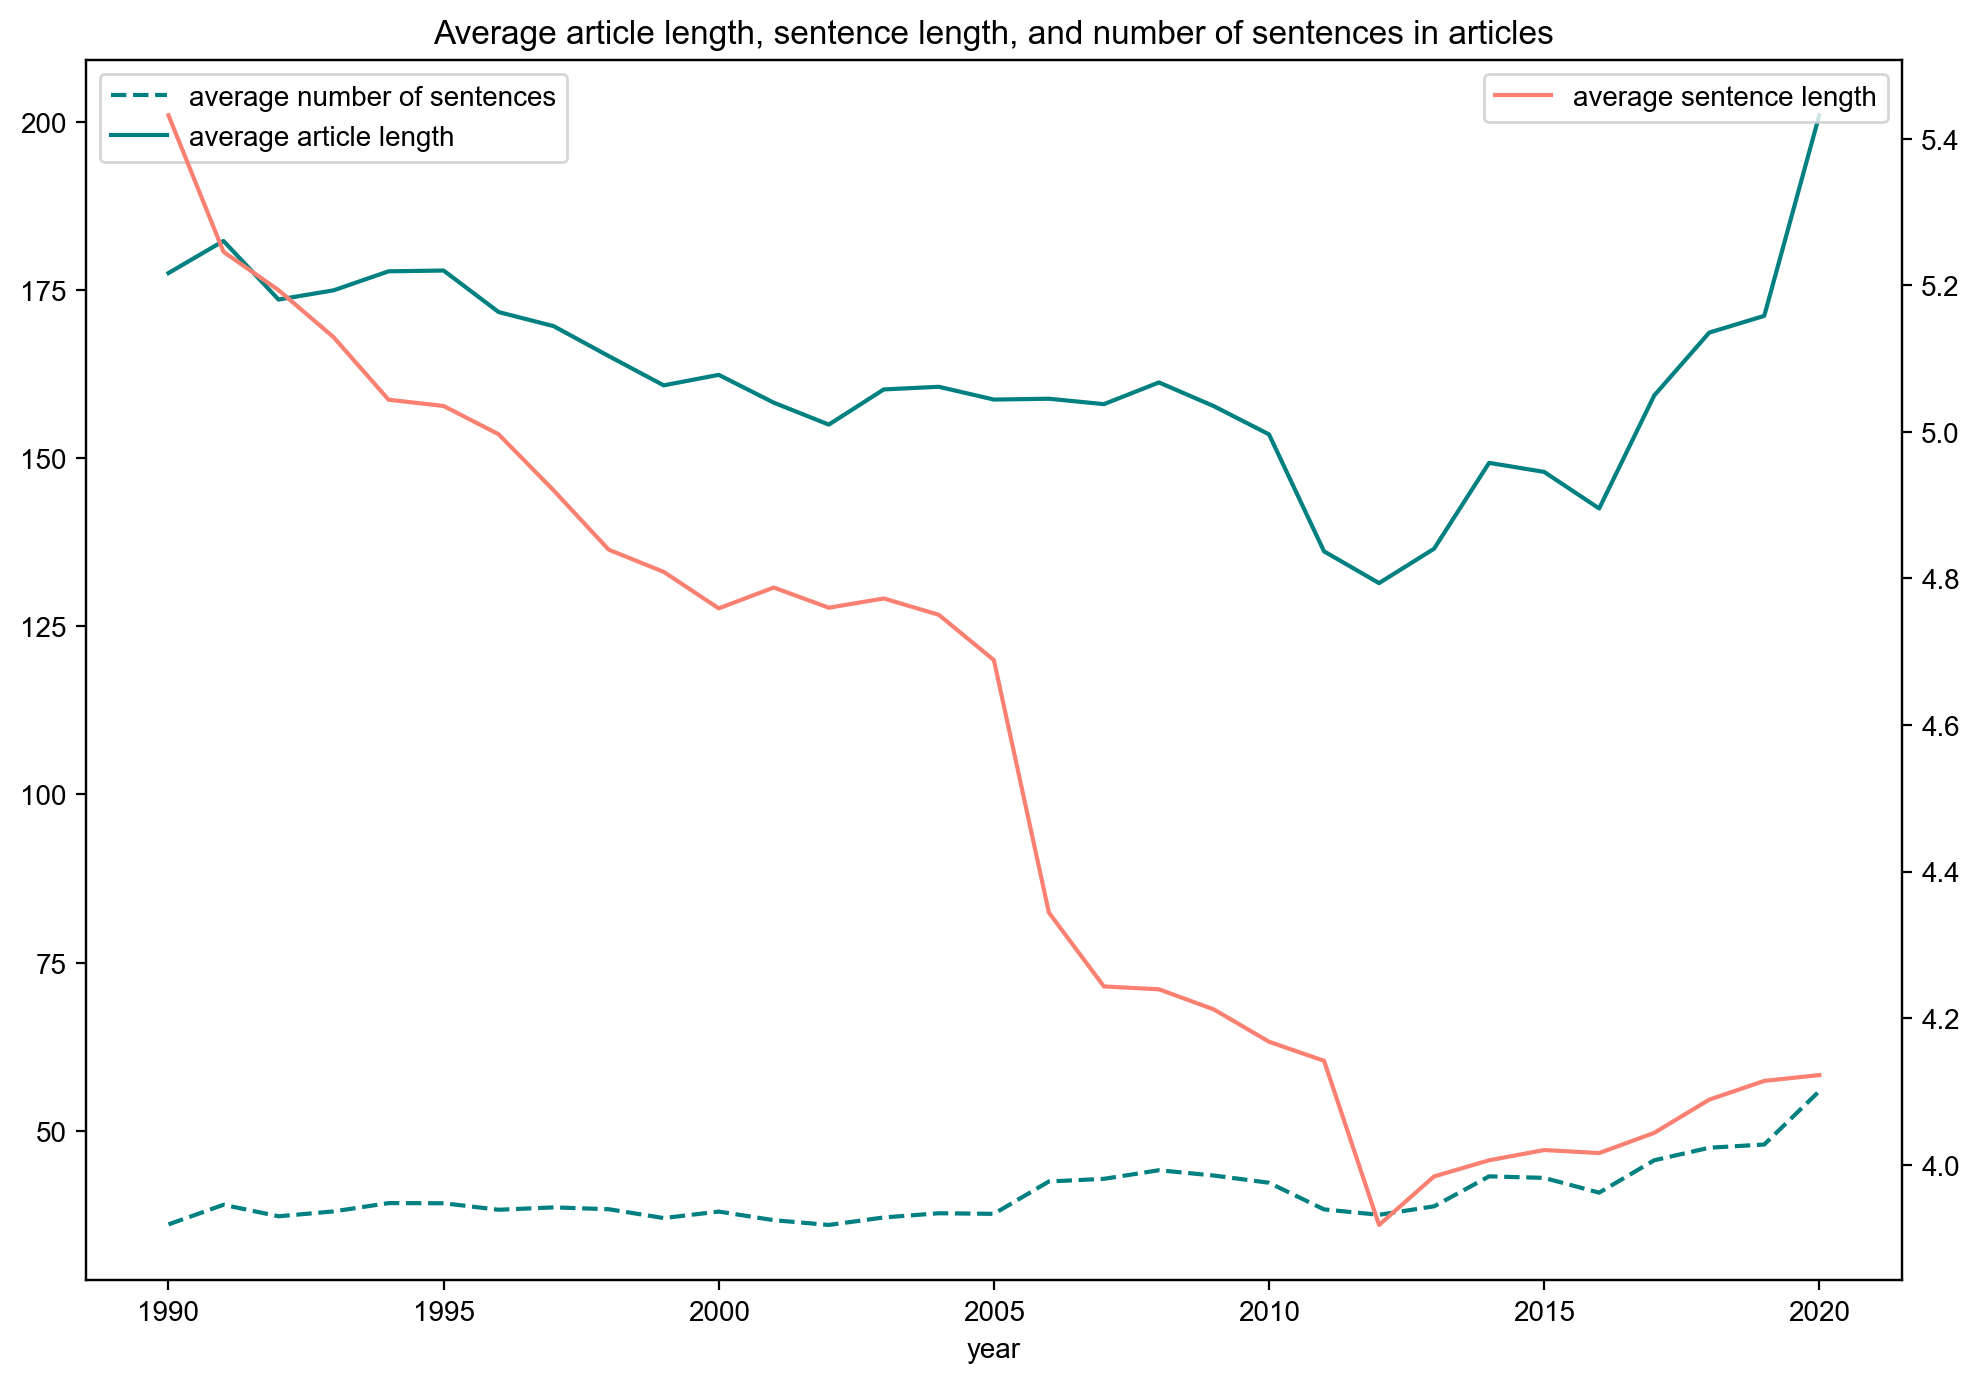

In [52]:
fig, ax  = plt.subplots(figsize=(10, 7))

ax = df.groupby('year')['s'].mean().plot(color='teal', linestyle='--')
ax = df.groupby('year')['len'].mean().plot(color='teal')
plt.legend(['average number of sentences', 'average article length'])
ax = df.groupby('year')['len_s'].mean().plot(secondary_y=True, color='salmon')
plt.legend(['average sentence length'])

#plt.ylabel('relative frequency')
ax.set_title('Average article length, sentence length, and number of sentences in articles')
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
plt.tight_layout()
plt.savefig('../images/article_stats.pdf', bbox_inches='tight')

In [114]:
df['len'].sum()

93278902

In [115]:
def count_word_occurrences(text, word):
    pattern = re.compile(r'\b' + re.escape(word) + r'\b', re.IGNORECASE)
    matches = pattern.findall(text)
    count = len(matches)
    return count

In [57]:
len_years = df.groupby('year')['len'].sum()

In [105]:
def find_pair(w1, w2):
    return w1.lower() == 'rechts' and w2.lower() == 'links'

# Filter de rijen waarin het woordpaar "man-vrouw" voorkomt
found_pairs = pairs_df[pairs_df.apply(lambda row: find_pair(row["w1"], row["w2"]), axis=1)]

# Groepeer op basis van het jaar en tel het aantal rijen in elke groep
result_1 = found_pairs.groupby("year").size()

In [ ]:
pair1 = ['man', 'vrouw']
pair2 = ['eigen', 'ander']
pair3 = ['zwart', 'wit']
pair4 = ['links', 'rechts']

In [107]:
df['c1'] = df.cleaner.apply(lambda x: count_word_occurrences(x,'rechts'))
df['c2'] = df.cleaner.apply(lambda x: count_word_occurrences(x,'links'))

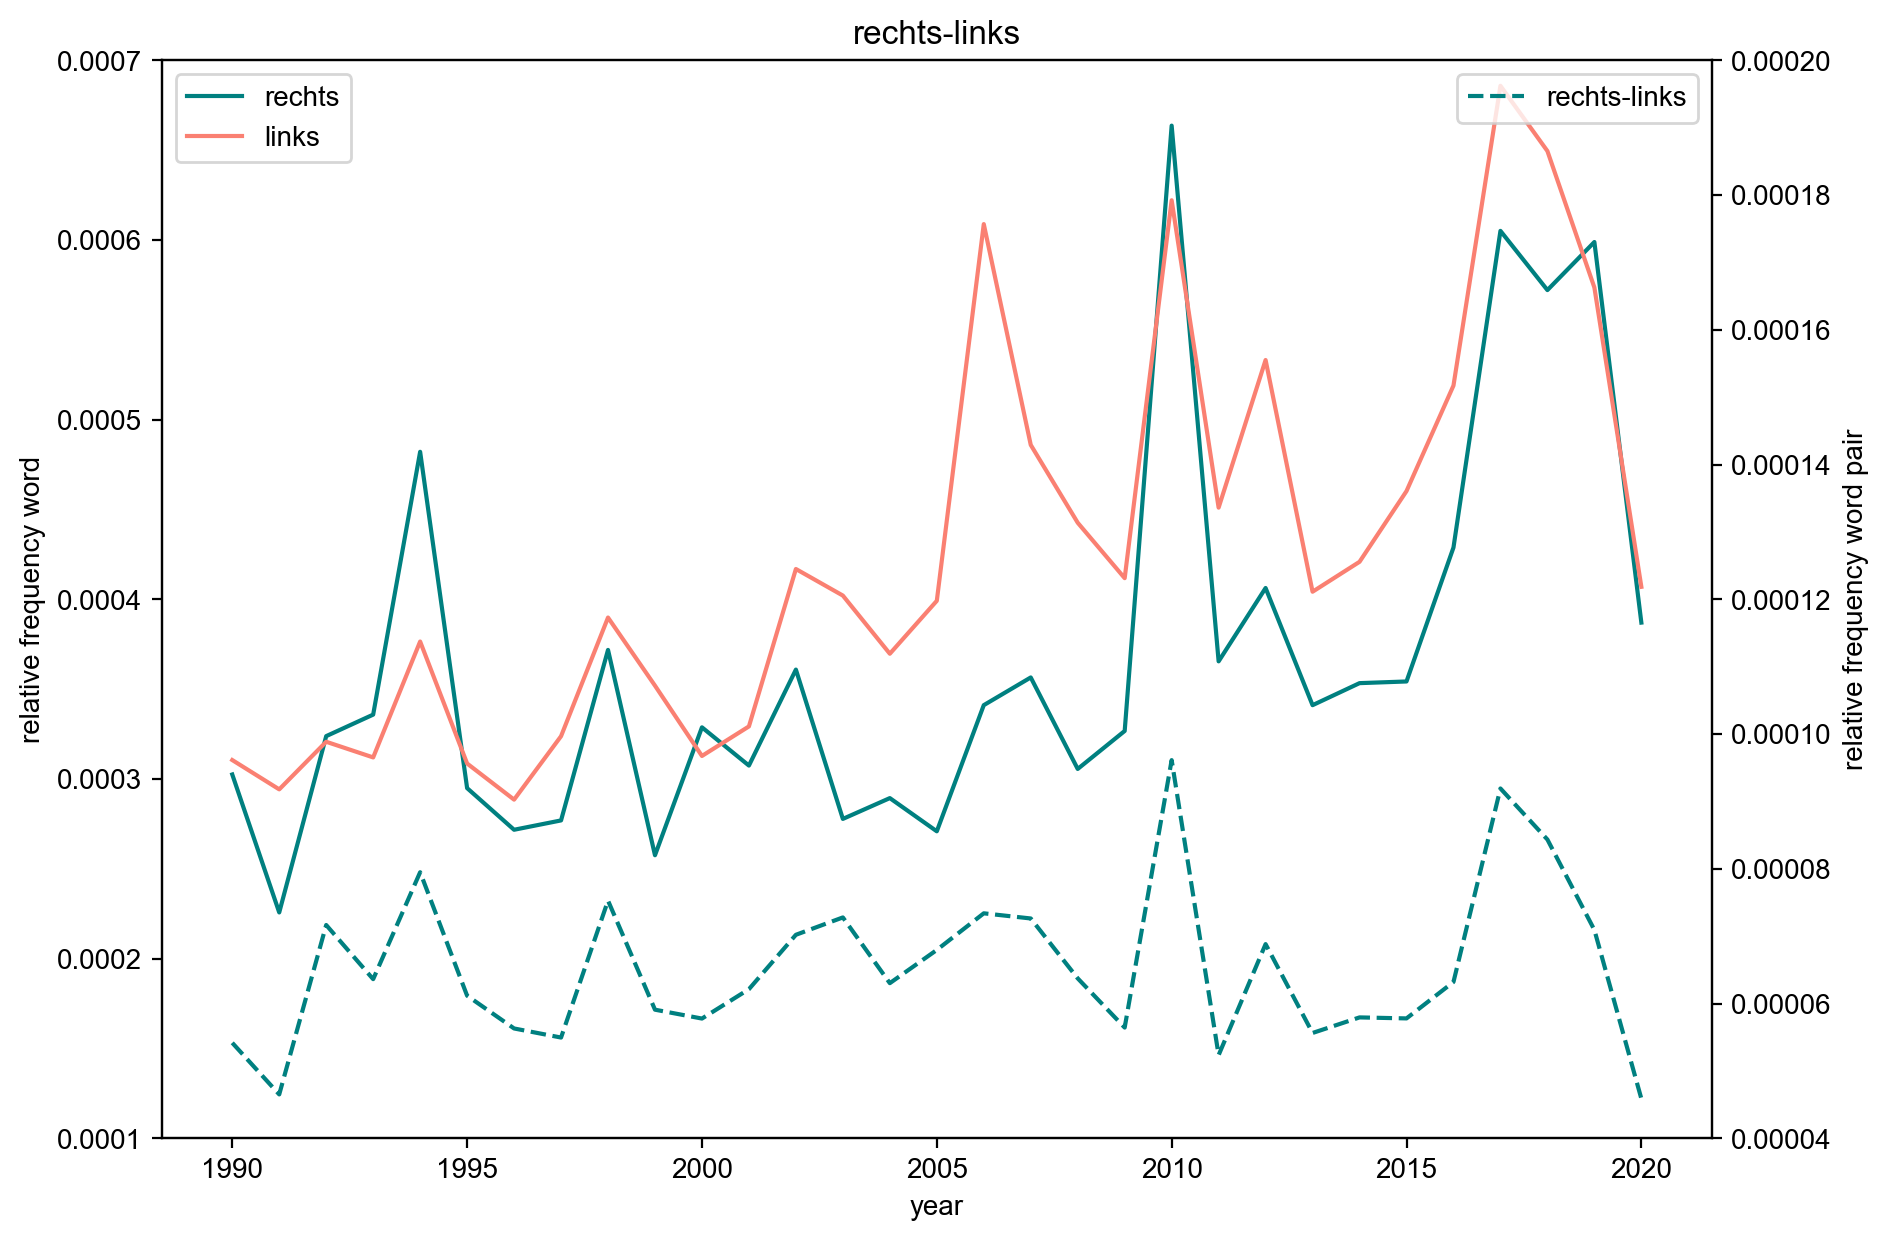

In [112]:
fig, ax = plt.subplots(figsize=(10,7))

ax = (df.groupby('year')['c1'].sum() / len_years).plot(color='teal')
ax = (df.groupby('year')['c2'].sum() / len_years).plot(color='salmon')
ax.legend(['rechts', 'links'], loc='upper left')
ax.set_ylabel('relative frequency word')
ax.set_ylim(0.0001, 0.0007)
ax.set_title('rechts-links')

ax2 = ax.twinx()
ax2 = (result_1 / len_years).plot(color='teal', linestyle='--')
ax2.set_ylabel('relative frequency word pair')
ax2.legend(['rechts-links'])
ax2.set_ylim(0.00004, 0.00020)

fig.savefig('../images/rechts_links.pdf', bbox_inches='tight')
